In [119]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn import datasets
import seaborn as sns
red_wine= pd.read_csv('winequality-red.csv')

In [120]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [121]:
red_wine.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [122]:
red_wine.corr(method="pearson")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [123]:
red_wine.drop(["fixed acidity", "free sulfur dioxide"], axis=1, inplace=True)

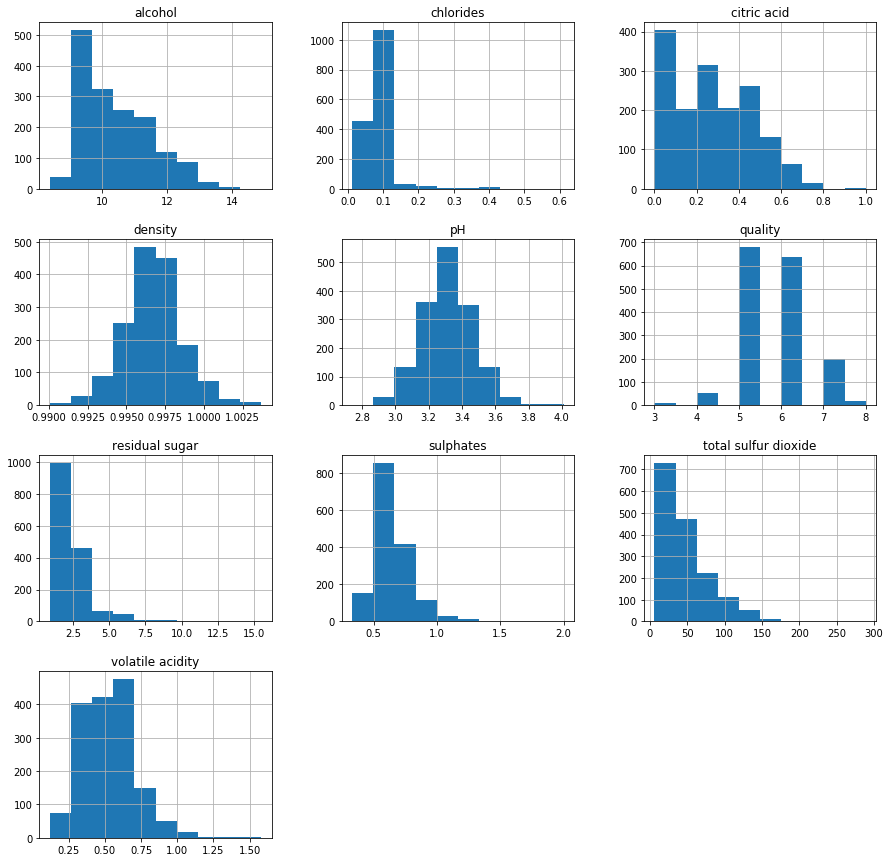

In [124]:
red_wine.hist(bins=10,figsize=(15, 15))
plt.show()


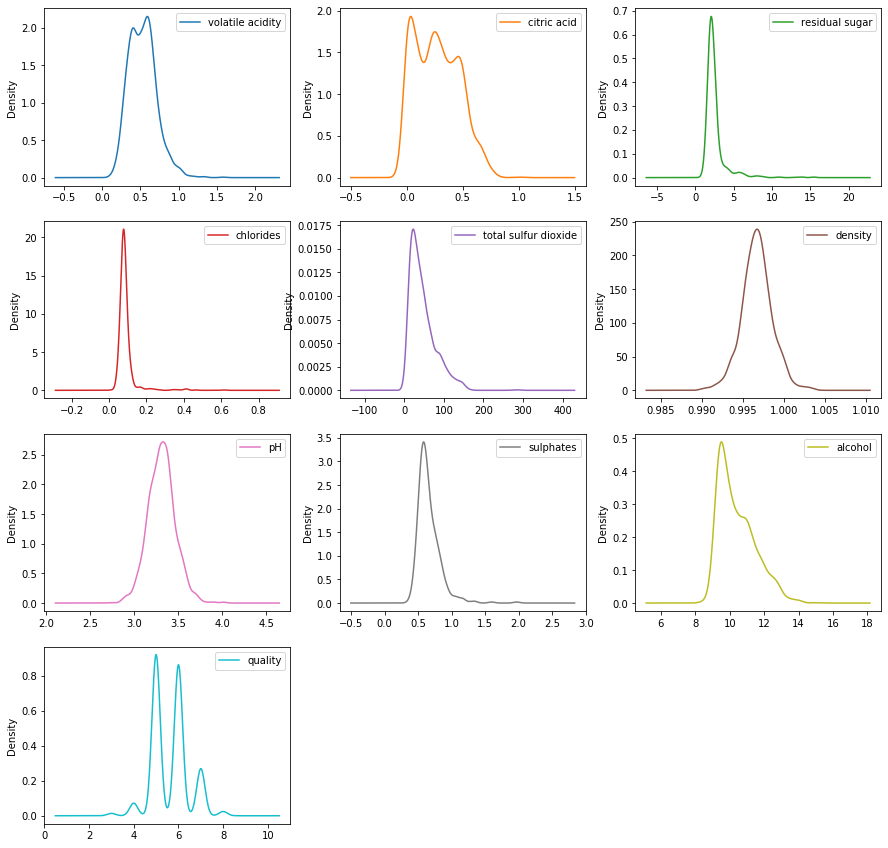

In [125]:
red_wine.plot(kind='density', subplots=True, layout=(4,3),figsize=(15, 15), sharex=False)
plt.show()

In [126]:
y = red_wine['quality']
x = red_wine.drop('quality',axis=1) 

In [127]:
x = x.to_numpy()
y = y.to_numpy()

In [128]:
reg = LinearRegression()

In [129]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
w = reg.coef_

In [131]:
b = reg.intercept_

In [132]:
y_ = reg.predict(x)

In [133]:
y_

array([5.04193428, 5.11556992, 5.22345982, ..., 5.91213036, 5.40333711,
       6.03976478])

In [134]:
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [135]:
reg.score(x,y)

0.358353965193008

In [136]:
x[9].shape

(9,)

In [137]:
x.shape

(1599, 9)

In [138]:
x[9].reshape(-1,1).shape

(9, 1)

In [139]:
reg.predict(x[9].reshape(1,-1))

array([5.72296782])

In [140]:
y[9]

5

In [141]:
red_wine.tail()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5
1598,0.310,0.47,3.6,0.067,42.0,0.99549,3.39,0.66,11.0,6


In [142]:
red_wine.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [143]:
red_wine.quality > 6.5

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: quality, Length: 1599, dtype: bool

In [144]:
q = 6.5
if y.all() > q:
    print('True')

In [145]:
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [146]:
#choosing 10 random data information for sampling
sample_wine = red_wine.sample(n=10, weights= 'quality', random_state=1, )

In [147]:
sample_wine

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
672,1.240,0.34,2.0,0.079,151.0,0.99800,3.15,0.53,9.5,5
1147,0.410,0.45,6.2,0.071,14.0,0.99702,3.21,0.49,11.8,7
0,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
489,0.390,0.40,2.6,0.073,26.0,0.99840,3.34,0.75,10.2,6
247,0.600,0.17,2.3,0.072,73.0,0.99630,3.20,0.45,9.3,5
157,0.430,0.42,5.5,0.071,128.0,0.99730,3.42,0.71,10.5,5
310,0.530,0.48,2.5,0.063,25.0,0.99980,3.12,0.59,9.3,6
555,0.645,0.49,4.2,0.095,23.0,1.00315,2.92,0.74,11.1,5
638,0.915,0.12,2.2,0.143,23.0,0.99640,3.35,0.65,10.2,7
874,0.380,0.46,2.1,0.104,10.0,0.99664,3.12,0.65,11.8,7


In [148]:
sample_wine.quality>6.5

672     False
1147     True
0       False
489     False
247     False
157     False
310     False
555     False
638      True
874      True
Name: quality, dtype: bool

In [149]:
sample_wine.mean (axis=0)

volatile acidity         0.624000
citric acid              0.333000
residual sugar           3.150000
chlorides                0.084700
total sulfur dioxide    50.700000
density                  0.998081
pH                       3.234000
sulphates                0.612000
alcohol                 10.310000
quality                  5.800000
dtype: float64

In [150]:
#entropy of 0.88
#Gain(S, Attribute = volatile acidity. Average = 0.62)
#Sabove - [1+, 3-] =0.81
#Sbelow - [2+, 4-] =0.92
#Gain(S, volatile acidity) = -0.004

In [151]:
#entropy of 0.88
#Gain(S, Attribute = citric acid. Average = 0.33)
#Sabove - [2+, 5-] =0.86
#Sbelow - [1+, 2-] =0.92
#Gain(S, citric acid) = -0.002

In [152]:
#Gain(S, Attribute = residual sugar. Average = 3.15)
#Sabove - [1+, 2-] =0.92
#Sbelow - [2+, 5-] =0.86
#Gain(S, residual sugar) = -0.002

In [153]:
#entropy of 0.88
#Gain(S, Attribute = chlorides. Average = 0.08)
#Sabove - [2+, 1-] =0.92
#Sbelow - [1+, 6-] =0.59
#Gain(S, chlorides) = -0.191

In [154]:
#entropy of 0.88
#Gain(S, Attribute = total sulfur dioxide . Average = 50.70)
#Sabove - [0+, 3-] =0
#Sbelow - [3+, 4-] =0.99
#Gain(S, total sulfur dioxide ) = -0.187

In [155]:
#entropy of 0.88
#Gain(S, Attribute = density. Average = 0.998)
#Sabove - [0+, 3-] =0
#Sbelow - [3+, 4-] =0.99
#Gain(S, density) = -0.187

In [156]:
#entropy of 0.88
#Gain(S, Attribute = pH . Average = 3.23)
#Sabove - [1+, 3-] =0.81
#Sbelow - [2+, 4-] =0.92
#Gain(S, pH) = -0.004

In [157]:
#entropy of 0.88
#Gain(S, Attribute = sulphates . Average = 0.61)
#Sabove - [2+, 3-] =0.97
#Sbelow - [1+, 4-] =0.72
#Gain(S, sulphates) = -0.035

In [158]:
#entropy of 0.88
#Gain(S, Attribute = alcohol . Average = 10.31)
#Sabove - [2+, 2-] =1
#Sbelow - [1+, 5-] =0.65
#Gain(S, alcohol) = -0.090

In [159]:
#using "chlorides" attribute for information gain

0    1382
1     217
Name: quality, dtype: int64


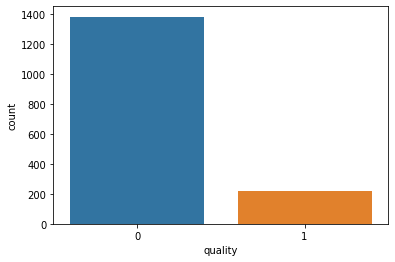

In [160]:

bins = (2, 6, 8)
group_names = ['bad', 'good']
red_wine['quality'] = pd.cut(red_wine['quality'], bins = bins, labels = group_names)

label_quality = LabelEncoder()

red_wine['quality'] = label_quality.fit_transform(red_wine['quality'])
print(red_wine['quality'].value_counts())
sns.countplot(red_wine['quality'])
plt.show()

In [161]:
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [162]:
ada_classifier = AdaBoostClassifier(n_estimators=100)
ada_classifier.fit(x, y)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

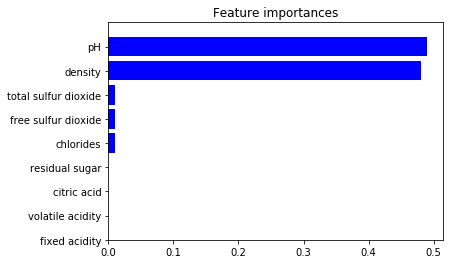

In [163]:
importance=ada_classifier.feature_importances_

std = np.std([tree.feature_importances_ for tree in ada_classifier.estimators_],
             axis=0)
indices = np.argsort(importance)

plt.figure()
plt.title("Feature importances")
plt.barh(range(x.shape[1]), importance[indices],
       color="b",  align="center")

plt.yticks(range(x.shape[1]), colum_names)
plt.ylim([0, x.shape[1]])
plt.show()
